# EDA. Практическая работа

## Цели практической работы

1. Потренироваться выявлять и заполнять пропущенные значения в данных.
2. Потренироваться преобразовывать типы данных.
3. Потренироваться выявлять и обрабатывать аномальные значения в данных.
4. Подготовить датафрейм к этапу генерации признаков.


### Что нужно сделать

Напомним, что вы работаете с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах.

Постройте первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства. Для этого выполните восемь обязательных задач:

1. Загрузите датасет и ознакомьтесь с количеством пропущенных значений.
2. Обработайте пропуски в годе выпуска автомобиля.
3. Обработайте пропуски в типе топлива.
4. Обработайте пропуски в модели автомобиля.
5. Обработайте пропуски в статусе автомобиля.
6. Преобразуйте типы данных в годе выпуска автомобиля.
7. Преобразуйте типы данных в категориальные переменные.
8. Определите выбросы в годе выпуска.
9. Необязательная задача: загрузите датафрейм с параметрами преобразования.


### Что оценивается

1. Программа выдаёт верный ответ на заданном наборе данных.
2. Описаны причины выбранного решения, если требуется.
3. Код читабелен: переменным даны осмысленные названия, отступы и правила расстановки пробелов соблюдены.

## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему преподавателю.


## Задача

Вы продолжаете работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.


## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


Операции над датасетом в Python:


df.isna()

#Получить процент пропущенных значений по каждой колонке

#Функция isna() создаёт маску, где у каждого объекта будет True или False. Значения None или numpy.NaN отображаются как True

#Из маски isna() просуммируем получившиеся значения. При работе с булевыми значениями sum посчитает количество входящих True. После этого разделим на всё количество объектов, домножим на 100 для перевода в проценты и отсортируем по возрастанию

missing_values = ((df.isna().sum() / len(df)) * 100).sort_values()


#Получить количество значений NaN в колонке

df.county.value_counts(dropna=False) # county — название колонки


#Скопировать исходный набор данных в новый набор данных

df_clean = df.copy()


#Получить количество и процент полностью заполненных объектов из всей выборки

#dropna() используется для удаления строк и столбцов с пустыми значениями

def print_useful_rows_info(df):

   print('Количество полностью заполненных объектов из всей     выборки: ', len(df.dropna()))

   print('Процент полностью заполненных объектов из всей выборки: ', round(len(df.dropna()) / len(df) * 100, 2))


#Удалить столбцы из набора данных

df_clean = df_clean.drop(columns=['VIN', 'condition', 'cylinders', 'size', 'drive', 'paint_color', 'type'])

# в квадратных скобках перечисляем названия столбцов, которые мы хотим удалить


#Заполнить NA значения выбранным дефолтным значением

df_clean.manufacturer = df_clean.manufacturer.fillna('other')

# manufacturer — название столбца, 'other' — значение, которым будут заполняться NA


#Получить среднее значение по столбцу

df_clean.odometer.mean() # odometer — название столбца


#Записать набор данных в файл .csv

df_clean.to_csv('data/df_clean.csv')

In [1]:
# Импортируйте необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Задача 1. Загрузите датасет и ознакомьтесь с наличием дубликатов и количеством пропущенных значений.


In [3]:
# загружаю обновленнй датасет
data = pd.read_csv("/content/drive/MyDrive/SkillBox/data/vehicles_dataset_updated_1.csv")
data.head()

,Unnamed: 0,id,url,region,region_url,price,cylinders,fuel,odometer,title_status,...,lat,long,posting_date,price_category,county3,manufacturer_new,year_new,model_new,fuel_new,condition_new
0,0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,NaN,diesel,27442.0,clean,...,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,NaN,ram,2020.0,2500 crew cab big horn,diesel,good
1,1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,6 cylinders,NaN,60023.0,clean,...,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,NaN,ford,2016.0,explorer 4wd 4dr xlt,gas,good
2,2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,NaN,gas,14048.0,clean,...,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,reno,volkswagen,2017.0,golf r hatchback,gas,good
3,3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,NaN,gas,117291.0,clean,...,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,raleigh,toyota,2013.0,rav4,gas,excellent
4,4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,4 cylinders,gas,8000.0,clean,...,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,NaN,nissan,2021.0,altima,gas,good


In [4]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

2. Выведите размер датасета.


In [5]:
# размер датасета
data.shape

(10000, 28)

## Узнаем, есть ли среди всех значений дублирующиеся
Функция возвращает булевую (boolean) маску


In [6]:
df_duplicated = pd.DataFrame(data.duplicated(), columns = ['result'])

# подсчитали количество дубликатов - 50 штук
df_duplicated.value_counts()

result
False     10000
dtype: int64

Для удаления дубликатов используем функцию

In [ ]:
# data = data.drop_duplicates()

Для визуального определения того, сколько пропусков в той или иной колонке импортируем пакет missingno как msno

msno.bar(df)
Вывести матрицу пропусков, которая повторяет структуру нашего датасета, где чёрным закрашены заполненные значения, а белым — пропуски

msno.matrix(df)

<Axes: >

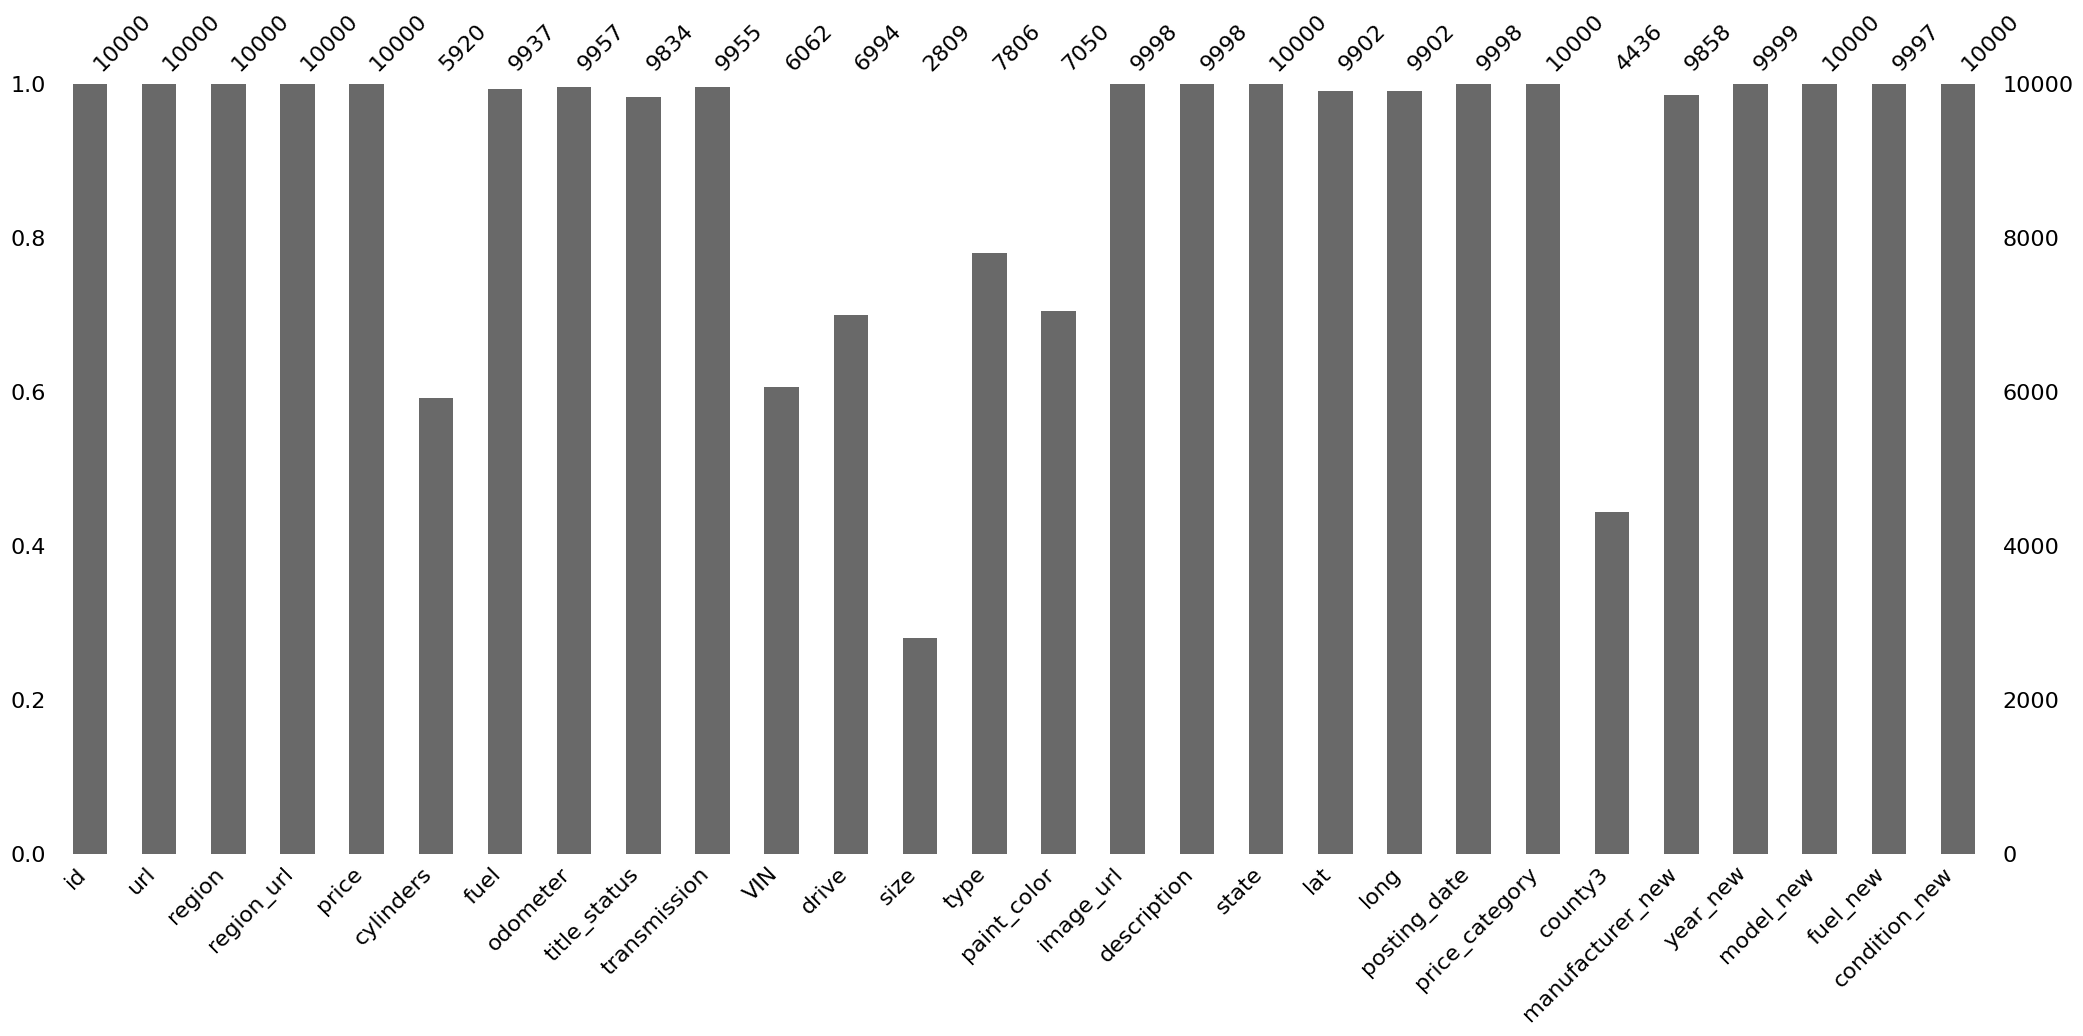

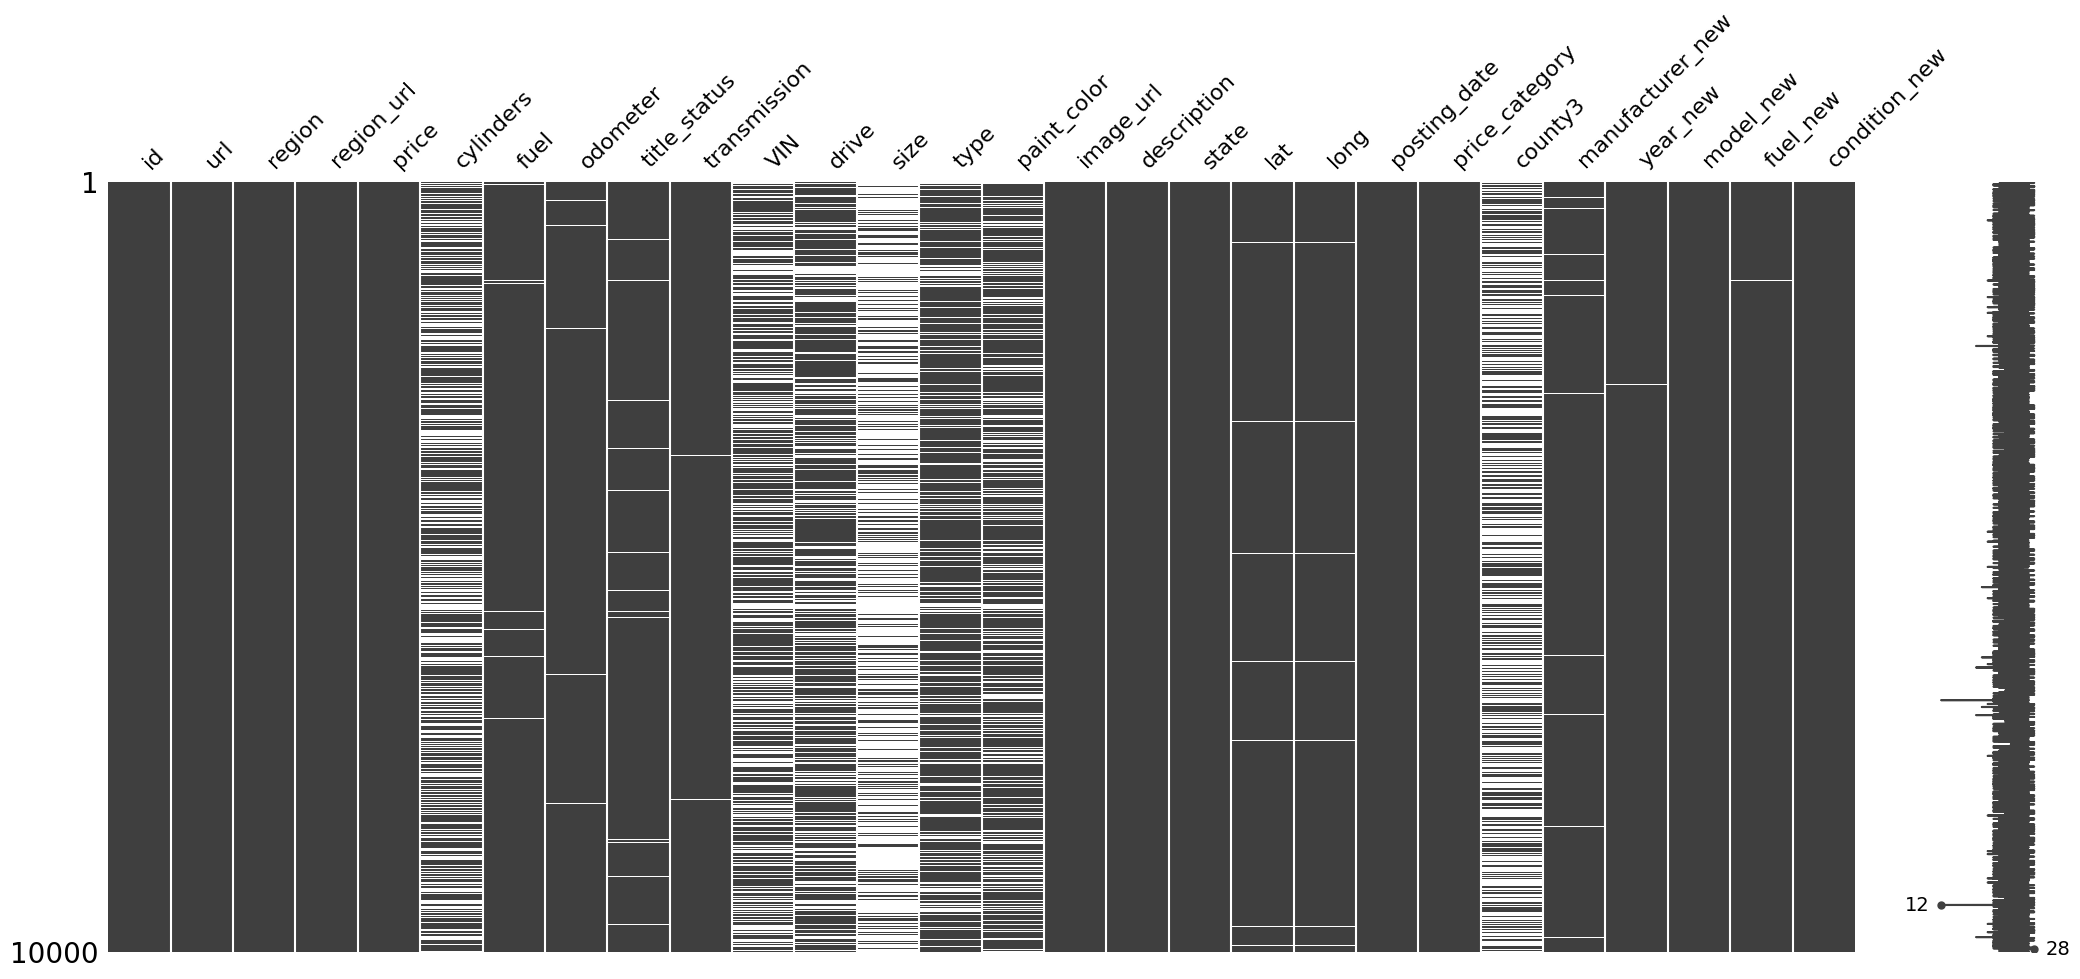

In [7]:
import missingno as msno
#1. Построим график, который показывает сколько пропусков в каждой колонке
msno.bar(data)

#2. Выведем матрицу пропусков, которая повторяет структуру нашего датасета, где чёрным закрашены заполненные значения, а белым — пропуски
msno.matrix(data)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   url               10000 non-null  object 
 2   region            10000 non-null  object 
 3   region_url        10000 non-null  object 
 4   price             10000 non-null  int64  
 5   cylinders         5920 non-null   object 
 6   fuel              9937 non-null   object 
 7   odometer          9957 non-null   float64
 8   title_status      9834 non-null   object 
 9   transmission      9955 non-null   object 
 10  VIN               6062 non-null   object 
 11  drive             6994 non-null   object 
 12  size              2809 non-null   object 
 13  type              7806 non-null   object 
 14  paint_color       7050 non-null   object 
 15  image_url         9998 non-null   object 
 16  description       9998 non-null   object 

Скопируем выдачу из предыдущей ячейки в пременную data_info

In [13]:
data_info = '''<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                10000 non-null  int64
 1   url               10000 non-null  object
 2   region            10000 non-null  object
 3   region_url        10000 non-null  object
 4   price             10000 non-null  int64
 5   cylinders         5920 non-null   object
 6   fuel              9937 non-null   object
 7   odometer          9957 non-null   float64
 8   title_status      9834 non-null   object
 9   transmission      9955 non-null   object
 10  VIN               6062 non-null   object
 11  drive             6994 non-null   object
 12  size              2809 non-null   object
 13  type              7806 non-null   object
 14  paint_color       7050 non-null   object
 15  image_url         9998 non-null   object
 16  description       9998 non-null   object
 17  state             10000 non-null  object
 18  lat               9902 non-null   float64
 19  long              9902 non-null   float64
 20  posting_date      9998 non-null   object
 21  price_category    10000 non-null  object
 22  county3           4436 non-null   object
 23  manufacturer_new  9858 non-null   object
 24  year_new          9999 non-null   float64
 25  model_new         10000 non-null  object
 26  fuel_new          9997 non-null   object
 27  condition_new     10000 non-null  object
dtypes: float64(4), int64(2), object(22)
memory usage: 2.1+ MB'''

Далее разработал функцию **info_2_df** для вычисления числа пропусков по каждому признаку и их доли от общего числа строк:

In [14]:
def info_2_df(data_info):
    '''
    функция конвертирует таблицу из текстовой информации,
    возвращаемой функцией info()
    в pandas датафрейм
    '''
    range_index = int(data_info.split('\n')[1].split()[1])
    #print(data_info)
    # Преобразование строки в список строк
    string_list = data_info.split('\n')[5:-2]
    #print(string_list)

    # Преобразование списка строк в список списков значений
    data_list = [line.split()[1:] for line in string_list][1:]

    # Создание датафрейма
    data_info = pd.DataFrame(data_list, columns= ['Feature','Numb_Non_Null','Count','Dtype'])
    data_info.drop('Count', axis=1 ,inplace = True)
    data_info['Numb_Non_Null'] = data_info['Numb_Non_Null'].astype(int)
    # создаём колонку с числом пропусков по каждому признаку
    data_info['Numb_Null'] = range_index - data_info['Numb_Non_Null']
    data_info['Percent_Null'] = round(100*data_info['Numb_Null']/range_index,1)
    data_info = data_info.sort_values(by='Numb_Null', ascending=False)
    return data_info

## Количество пропусков в каждом признаке
Вычислинные с помощью функции info_2_df количества пропусков для каждого признака представлены в следующем датафрейме. Строки упорядочены в порядке убывания количества пропусков **Numb_Null**.

In [15]:
data_info = info_2_df(data_info)
data_info

,Feature,Numb_Non_Null,Dtype,Numb_Null,Percent_Null
11,size,2809,object,7191,71.9
21,county3,4436,object,5564,55.6
4,cylinders,5920,object,4080,40.8
9,VIN,6062,object,3938,39.4
10,drive,6994,object,3006,30.1
13,paint_color,7050,object,2950,29.5
12,type,7806,object,2194,21.9
7,title_status,9834,object,166,1.7
22,manufacturer_new,9858,object,142,1.4
17,lat,9902,float64,98,1.0


Итак, следующие признаки содержат практически все данные:<br>
posting_date <br>
image_url 	 <br>
description 	 <br>
state<br>
id<br>
url<br>
price<br>
region_url<br>
region<br>
price_category<br>



## Парсинг url с целью выявления полезных данных, в т.ч. и для заполнения пропусков
В интернете нашел список автопроизводителей. Он пригодиться для разбора данных из url.

In [ ]:
manufacturer_string = '''Acura
    AlfaRomeo
    Alpina
    Asia
    AstonMartin
    Audi
    Bentley
    BMW
    Brilliance
    Bugatti
    Buick
    BYD
    Cadillac
    Changan
    Chery
    Chevrolet
    Chrysler
    Citroen
    Dacia
    Daewoo
    Daihatsu
    Datsun
    DeLorean
    Derways
    Dodge
    Dongfeng
    FAW
    Ferrari
    Fiat
    Ford
    Foton
    Freightliner
    Geely
    Genesis
    GMC
    GreatWall
    Hafei
    Haima
    Haval
    Hawtai
    Hino
    Honda
    Hummer
    Hyundai
    Infiniti
    IranKhodro
    Isuzu
    JAC
    Jaguar
    Jeep
    Kia
    Koenigsegg
    Lamborghini
    Lancia
    LandRover
    Lexus
    Lifan
    Lincoln
    Lotus
    Luxgen
    Marussia
    Maserati
    Maybach
    Mazda
    McLaren
    Mercedes
    Mercury
    MINI
    Mitsubishi
    Mitsuoka
    Nissan
    Oldsmobile
    Opel
    Pagani
    Peugeot
    Plymouth
    Pontiac
    Porsche
    Proton
    Ravon
    Renault
    RollsRoyce
    Rover
    Saab
    Saturn
    Scion
    SEAT
    Skoda
    Smart
    SsangYong
    Subaru
    Suzuki
    Tesla
    Tianye
    Toyota
    Volkswagen
    Volvo
    Vortex
    Zotye
    ZX'''

In [ ]:
# нормализовал список
manufacturer_list = [elem.lower().strip() for elem in manufacturer_string.split('\n')]
manufacturer_list

['acura',
 'alfaromeo',
 'alpina',
 'asia',
 'astonmartin',
 'audi',
 'bentley',
 'bmw',
 'brilliance',
 'bugatti',
 'buick',
 'byd',
 'cadillac',
 'changan',
 'chery',
 'chevrolet',
 'chrysler',
 'citroen',
 'dacia',
 'daewoo',
 'daihatsu',
 'datsun',
 'delorean',
 'derways',
 'dodge',
 'dongfeng',
 'faw',
 'ferrari',
 'fiat',
 'ford',
 'foton',
 'freightliner',
 'geely',
 'genesis',
 'gmc',
 'greatwall',
 'hafei',
 'haima',
 'haval',
 'hawtai',
 'hino',
 'honda',
 'hummer',
 'hyundai',
 'infiniti',
 'irankhodro',
 'isuzu',
 'jac',
 'jaguar',
 'jeep',
 'kia',
 'koenigsegg',
 'lamborghini',
 'lancia',
 'landrover',
 'lexus',
 'lifan',
 'lincoln',
 'lotus',
 'luxgen',
 'marussia',
 'maserati',
 'maybach',
 'mazda',
 'mclaren',
 'mercedes',
 'mercury',
 'mini',
 'mitsubishi',
 'mitsuoka',
 'nissan',
 'oldsmobile',
 'opel',
 'pagani',
 'peugeot',
 'plymouth',
 'pontiac',
 'porsche',
 'proton',
 'ravon',
 'renault',
 'rollsroyce',
 'rover',
 'saab',
 'saturn',
 'scion',
 'seat',
 'skoda',


# Займёмся парсингом url

In [ ]:
# везде встречается https:
# [https:, ]    10000
# Name: url, dtype: int64
data['url'].apply(lambda x: x.split('/')[:2]).value_counts()

[https:, ]    10000
Name: url, dtype: int64

In [ ]:
# Поскольку фрагмент [https:, ] встречается везде, то распарсим url следующим образом:
data['url'].apply(lambda x: x.split('/')[2:])

0        [chattanooga.craigslist.org, ctd, d, chattanoo...
1        [newjersey.craigslist.org, ctd, d, carlstadt-2...
2        [reno.craigslist.org, ctd, d, atlanta-2017-vw-...
3        [fayetteville.craigslist.org, ctd, d, raleigh-...
4        [newyork.craigslist.org, lgi, cto, d, baldwin-...
                               ...                        
10045    [chautauqua.craigslist.org, ctd, d, falconer-2...
10046    [binghamton.craigslist.org, ctd, d, rochester-...
10047    [salem.craigslist.org, ctd, d, salem-2011-audi...
10048    [madison.craigslist.org, ctd, d, madison-2015-...
10049    [norfolk.craigslist.org, ctd, d, chesapeake-20...
Name: url, Length: 10000, dtype: object

# Попробуем восстановить названия округа из url

Кажется, что в записи вроде chattanooga.craigslist.org первый токен соотвествует названию округа США. Однако, дальнейшие проверки покажут, что это не так.

In [ ]:
# загрузим скаченный в интернете список округов США
# путь к файлу /content/drive/MyDrive/SkillBox/data/uscounties.csv
data_us_counties = pd.read_csv("/content/drive/MyDrive/SkillBox/data/uscounties.csv")
data_us_counties.head()

,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population
0,Los Angeles,Los Angeles,Los Angeles County,6037,CA,California,34.3209,-118.2247,10019635
1,Cook,Cook,Cook County,17031,IL,Illinois,41.8401,-87.8168,5265398
2,Harris,Harris,Harris County,48201,TX,Texas,29.8577,-95.3936,4697957
3,Maricopa,Maricopa,Maricopa County,4013,AZ,Arizona,33.3490,-112.4915,4367186
4,San Diego,San Diego,San Diego County,6073,CA,California,33.0343,-116.7350,3296317


In [ ]:
us_county_list = [county.lower() for county in list(data_us_counties['county'])]
print(us_county_list)

['los angeles', 'cook', 'harris', 'maricopa', 'san diego', 'orange', 'kings', 'miami-dade', 'dallas', 'riverside', 'queens', 'king', 'clark', 'san bernardino', 'tarrant', 'bexar', 'broward', 'santa clara', 'wayne', 'alameda', 'new york', 'middlesex', 'philadelphia', 'sacramento', 'suffolk', 'palm beach', 'bronx', 'hillsborough', 'orange', 'nassau', 'franklin', 'oakland', 'hennepin', 'travis', 'cuyahoga', 'allegheny', 'salt lake', 'contra costa', 'fairfax', 'wake', 'mecklenburg', 'montgomery', 'fulton', 'collin', 'pima', 'honolulu', 'fresno', 'st. louis', 'westchester', 'duval', 'marion', 'pinellas', "prince george's", 'fairfield', 'bergen', 'erie', 'gwinnett', 'milwaukee', 'dupage', 'shelby', 'pierce', 'kern', 'hartford', 'denton', 'macomb', 'san francisco', 'hidalgo', 'new haven', 'el paso', 'middlesex', 'worcester', 'essex', 'montgomery', 'baltimore', 'ventura', 'hamilton', 'snohomish', 'multnomah', 'fort bend', 'essex', 'suffolk', 'oklahoma', 'jefferson', 'san joaquin', 'cobb', 'san

In [ ]:
#из нулевого элемента кажется можно извлечь county
data['county'] = data['url'].apply(lambda x: x.split('/')[2]).apply(lambda x: x.split('.')[0] if x.split('.')[0] in us_county_list else np.nan) #условие для проверки наличия токена в списке округов
#data[data['couty'].isna()]['couty'] = data['url'].apply(lambda x: x.split('/')[5].split('-')[0] if x.split('/')[5].split('-')[0] in us_county_list else np.nan)
data['county']

0               NaN
1               NaN
2              reno
3               NaN
4               NaN
            ...    
10045    chautauqua
10046           NaN
10047         salem
10048       madison
10049       norfolk
Name: county, Length: 10000, dtype: object

In [ ]:
# data['couty'].value_counts(dropna = False)
data['county'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 0 to 10049
Series name: county
Non-Null Count  Dtype 
--------------  ----- 
3010 non-null   object
dtypes: object(1)
memory usage: 414.3+ KB


In [ ]:
data['county2'] = data['url'].apply(lambda x: x.split('/')[5].split('-')[0] if x.split('/')[5].split('-')[0] in us_county_list else np.nan)
data['county2']

0               NaN
1               NaN
2               NaN
3           raleigh
4               NaN
            ...    
10045           NaN
10046           NaN
10047         salem
10048       madison
10049    chesapeake
Name: county2, Length: 10000, dtype: object

In [ ]:
# другой источник дал всего лишь на 17 больше данных - 3027
data['county2'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 0 to 10049
Series name: county2
Non-Null Count  Dtype 
--------------  ----- 
3027 non-null   object
dtypes: object(1)
memory usage: 414.3+ KB


In [ ]:
#data[data['county'].isna()*data['county2'].notna()]['county2']


3           raleigh
8           wyoming
11        fairfield
12           orange
29           porter
            ...    
10027        otsego
10028       carroll
10036      oklahoma
10039      fountain
10040    huntington
Name: county2, Length: 1426, dtype: object

In [ ]:
data[data['county'].notna() != data['county2'].notna()][['county','county2']]

In [ ]:
# непустые значения из 2-х колонок кладу в 3-ю колонку county3
data['county3'] = data['county'].combine_first(data['county2'])

In [ ]:
data[data['county'].notna() != data['county2'].notna()][['county','county2','county3']]

,county,county2,county3
2,reno,NaN,reno
3,NaN,raleigh,raleigh
8,NaN,wyoming,wyoming
11,NaN,fairfield,fairfield
12,NaN,orange,orange
...,...,...,...
10033,baltimore,NaN,baltimore
10036,NaN,oklahoma,oklahoma
10039,NaN,fountain,fountain
10040,NaN,huntington,huntington


In [ ]:
data['county3'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 0 to 10049
Series name: county3
Non-Null Count  Dtype 
--------------  ----- 
4436 non-null   object
dtypes: object(1)
memory usage: 414.3+ KB


Восстановили county из url. Однако проверка по списку округов охладила наш порыв, поскольку только 3010 округов нашлись в официальном списке. Выделение названия округа из остальных данных url и объединение с полученными даёт 4436 легитимных записей. Что меньше 50%. Печально...

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10049
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    9618 non-null   object 
 7   model           9872 non-null   object 
 8   condition       6234 non-null   object 
 9   cylinders       5920 non-null   object 
 10  fuel            9937 non-null   object 
 11  odometer        9957 non-null   float64
 12  title_status    9834 non-null   object 
 13  transmission    9955 non-null   object 
 14  VIN             6062 non-null   object 
 15  drive           6994 non-null   object 
 16  size            2809 non-null   object 
 17  type            7806 non-null  

In [ ]:
# удалим колонки 'couty', 'county2','county', 'couty2' из датафрейма data
data.drop(['couty', 'county2','county', 'couty2'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    9618 non-null   object 
 7   model           9872 non-null   object 
 8   condition       6234 non-null   object 
 9   cylinders       5920 non-null   object 
 10  fuel            9937 non-null   object 
 11  odometer        9957 non-null   float64
 12  title_status    9834 non-null   object 
 13  transmission    9955 non-null   object 
 14  VIN             6062 non-null   object 
 15  drive           6994 non-null   object 
 16  size            2809 non-null   object 
 17  type            7806 non-null  

# Далее

In [ ]:
# состав результарующего списка

data['url'].apply(lambda x: x.split('/')[-2])

0          chattanooga-2020-ram-2500-crew-cab-big
1                    carlstadt-2016-ford-explorer
2                 atlanta-2017-vw-volkswagen-golf
3            raleigh-2013-toyota-rav4-xle-4dr-suv
4         baldwin-2021-nissan-altima-sv-with-only
                           ...                   
10045                    falconer-2002-toyota-rav
10046                rochester-2008-jeep-wrangler
10047    salem-2011-audi-a3-20t-premium-plus-pzev
10048      madison-2015-porsche-cayenne-awd-4dr-e
10049       chesapeake-2017-ram-1500-crew-cab-big
Name: url, Length: 10000, dtype: object

In [ ]:
# распарсим каждую строку:
data['url'].apply(lambda x: x.split('/')[-2].split('-'))

0           [chattanooga, 2020, ram, 2500, crew, cab, big]
1                        [carlstadt, 2016, ford, explorer]
2                    [atlanta, 2017, vw, volkswagen, golf]
3             [raleigh, 2013, toyota, rav4, xle, 4dr, suv]
4          [baldwin, 2021, nissan, altima, sv, with, only]
                               ...                        
10045                        [falconer, 2002, toyota, rav]
10046                    [rochester, 2008, jeep, wrangler]
10047    [salem, 2011, audi, a3, 20t, premium, plus, pzev]
10048       [madison, 2015, porsche, cayenne, awd, 4dr, e]
10049        [chesapeake, 2017, ram, 1500, crew, cab, big]
Name: url, Length: 10000, dtype: object

In [ ]:
data['url'].apply(lambda x: x.split('/')[-2].split('-')[0]).nunique() #1882

1882

In [ ]:
# создадим новую колонку - model_from_url
data['model_from_url'] = data['url'].apply(lambda x: ' '.join(x.split('/')[-2].split('-')[1:])) # старая версия
#data['model_from_url'] = data['url'].apply(lambda x: x.split('/')[-2].split('-')[1:])
data['model_from_url']

0                2020 ram 2500 crew cab big
1                        2016 ford explorer
2                   2017 vw volkswagen golf
3              2013 toyota rav4 xle 4dr suv
4           2021 nissan altima sv with only
                        ...                
10045                       2002 toyota rav
10046                    2008 jeep wrangler
10047    2011 audi a3 20t premium plus pzev
10048        2015 porsche cayenne awd 4dr e
10049            2017 ram 1500 crew cab big
Name: model_from_url, Length: 10000, dtype: object

In [ ]:
# выделим легитимного автопроизводителя из url
data['manufacturer_from_url'] = data['url'].apply(lambda x: [elem for elem in x.split('/')[-2].split('-')[1:] if elem in manufacturer_list])
data['manufacturer_from_url'] = data['manufacturer_from_url'].apply(lambda x: x[0] if len(x)>0 else np.nan)
data['manufacturer_from_url']

0               NaN
1              ford
2        volkswagen
3            toyota
4            nissan
            ...    
10045        toyota
10046          jeep
10047          audi
10048       porsche
10049           NaN
Name: manufacturer_from_url, Length: 10000, dtype: object

In [ ]:
data[['manufacturer','manufacturer_from_url']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10049
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   manufacturer           9618 non-null   object
 1   manufacturer_from_url  8764 non-null   object
dtypes: object(2)
memory usage: 492.4+ KB


Количество легитимных производителей 8764

In [ ]:
data['manufacturer_new'] = data['manufacturer'].combine_first(data['manufacturer_from_url'])

In [ ]:
data['manufacturer_new'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 0 to 10049
Series name: manufacturer_new
Non-Null Count  Dtype 
--------------  ----- 
9858 non-null   object
dtypes: object(1)
memory usage: 414.3+ KB


Итого, парсинг url позволил заполнить 240 пропусков

In [ ]:
# удалим колонки 'manufacturer', 'manufacturer_from_url' из датафрейма data
data.drop(['manufacturer', 'manufacturer_from_url'], axis=1, inplace=True)

In [ ]:
# объединили данные по модели
data['model_new'] = data['model'].combine_first(data['model_from_url'])

# Извлечем год выпуска авто с помощью регулярных выражений

In [ ]:

import re
#pattern = r'\s(\d{4})\s'
#match = re.search(pattern, string)
# создадим новую колонку year_from_url
data['year_from_url'] = data['model_from_url'].apply(lambda x: re.findall(r'\d{4}', x) )
# ограничим год выпска авто диапазоном от 1900 до 2023 года
data['year_from_url'] = data['year_from_url'].apply(lambda x: x[0] if x != [] and (int(x[0]) > 1900 and int(x[0]) < 2023 ) else np.nan)
# частота встречаемости годов выпуска
data['year_from_url'].value_counts()

2018    783
2017    774
2016    684
2015    633
2013    626
       ... 
1953      1
1958      1
1937      1
1954      1
2022      1
Name: year_from_url, Length: 89, dtype: int64

In [ ]:
data['year_from_url'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 0 to 10049
Series name: year_from_url
Non-Null Count  Dtype 
--------------  ----- 
9031 non-null   object
dtypes: object(1)
memory usage: 414.3+ KB


In [ ]:
# объединим данные о годе выпуска в новой колонке year_new
data['year_new'] = data['year'].combine_first(data['year_from_url'])

In [ ]:
# один год не удалось восстановить
data[data['year_new'].isna()]

,id,url,region,region_url,price,year,model,condition,cylinders,fuel,...,state,lat,long,posting_date,price_category,county3,model_from_url,year_from_url,manufacturer_new,year_new
2632,7314588156,https://inlandempire.craigslist.org/ctd/d/hesp...,inland empire,https://inlandempire.craigslist.org,2599,NaN,olet Impala,NaN,6 cylinders,other,...,ca,34.45193,-117.28706,2021-04-29T16:19:54-0700,low,NaN,chevrolet impala sunday public,NaN,chevrolet,NaN


In [ ]:
# удалим колонки 'year', 'year_from_url', 'model', 'model_from_url' из датафрейма data
# data.drop(['year', 'year_from_url', 'model', 'model_from_url'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   url               10000 non-null  object 
 2   region            10000 non-null  object 
 3   region_url        10000 non-null  object 
 4   price             10000 non-null  int64  
 5   condition         6234 non-null   object 
 6   cylinders         5920 non-null   object 
 7   fuel              9937 non-null   object 
 8   odometer          9957 non-null   float64
 9   title_status      9834 non-null   object 
 10  transmission      9955 non-null   object 
 11  VIN               6062 non-null   object 
 12  drive             6994 non-null   object 
 13  size              2809 non-null   object 
 14  type              7806 non-null   object 
 15  paint_color       7050 non-null   object 
 16  image_url         9998 non-null   object

In [ ]:
data_info_new = '''<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                10000 non-null  int64
 1   url               10000 non-null  object
 2   region            10000 non-null  object
 3   region_url        10000 non-null  object
 4   price             10000 non-null  int64
 5   condition         6234 non-null   object
 6   cylinders         5920 non-null   object
 7   fuel              9937 non-null   object
 8   odometer          9957 non-null   float64
 9   title_status      9834 non-null   object
 10  transmission      9955 non-null   object
 11  VIN               6062 non-null   object
 12  drive             6994 non-null   object
 13  size              2809 non-null   object
 14  type              7806 non-null   object
 15  paint_color       7050 non-null   object
 16  image_url         9998 non-null   object
 17  description       9998 non-null   object
 18  state             10000 non-null  object
 19  lat               9902 non-null   float64
 20  long              9902 non-null   float64
 21  posting_date      9998 non-null   object
 22  price_category    10000 non-null  object
 23  county3           4436 non-null   object
 24  manufacturer_new  9858 non-null   object
 25  year_new          9999 non-null   object
 26  model_new         10000 non-null  object
dtypes: float64(3), int64(2), object(22)
memory usage: 2.4+ MB'''

In [ ]:
data_info_new = info_2_df(data_info_new)
data_info_new

,Feature,Numb_Non_Null,Dtype,Numb_Null,Percent_Null
13,size,2809,object,7191,71.9
23,county3,4436,object,5564,55.6
6,cylinders,5920,object,4080,40.8
11,VIN,6062,object,3938,39.4
5,condition,6234,object,3766,37.7
12,drive,6994,object,3006,30.1
15,paint_color,7050,object,2950,29.5
14,type,7806,object,2194,21.9
9,title_status,9834,object,166,1.7
24,manufacturer_new,9858,object,142,1.4


Итак, что сделано по нашим задачам:

1. Загрузите датасет и ознакомьтесь с количеством пропущенных значений.

2. Обработайте пропуски в годе выпуска автомобиля - это сделано
3. Обработайте пропуски в типе топлива - это далее
4. Обработайте пропуски в модели автомобиля - это сделано
5. Обработайте пропуски в статусе автомобиля - над этим пока не думал.
6. Преобразуйте типы данных в годе выпуска автомобиля.
7. Преобразуйте типы данных в категориальные переменные.
8. Определите выбросы в годе выпуска.

Что значит загрузите датафрейм с параметрами преобразования?
Т.е. отправить куратору?
9. Необязательная задача: загрузите датафрейм с параметрами преобразования.

# Заполним пропуски у признака condition - состояние машинки
Как будем заполнять ?

In [ ]:
# Что можно сделать с признаком топливо?
data['condition'].isna().value_counts()

False    6234
True     3766
Name: condition, dtype: int64

In [ ]:
# data['year_new'] = data['year_new'].apply(lambda x: float(x) if x else x)

In [ ]:
data[data['condition'].isna()]['year_new'].value_counts()

2017.0    323
2016.0    312
2015.0    310
2018.0    305
2014.0    283
         ... 
1957.0      1
1962.0      1
1931.0      1
1954.0      1
2022.0      1
Name: year_new, Length: 75, dtype: int64

Есть года с целым типом и есть года в текстовом формате

In [ ]:
# распределение пропусков в поле состояние авто по годам
data[data['condition'].isna()][['manufacturer_new','year_new']].value_counts(sort = False)

manufacturer_new  year_new
acura             2002.0      2
                  2004.0      1
                  2005.0      1
                  2006.0      2
                  2007.0      3
                             ..
volvo             2016.0      2
                  2017.0      1
                  2018.0      1
                  2019.0      3
                  2020.0      1
Length: 682, dtype: int64

In [ ]:
# распределение пропусков в поле состояние авто по производителям (не посмотрел эту сводную таблицу)
# можно еще для производителя рассчитать дискретные вероятности  и тогда состояние авто будет считаться через условные вероятности (пока)
# df_manufacturer_condition = pd.pivot_table(data, index=['manufacturer_new'], columns='condition', values='model_new', aggfunc='count', fill_value=0)
df_manufacturer_condition = pd.pivot_table(data, index=['manufacturer_new'], columns='condition_new', values='model_new', aggfunc='count', fill_value=0)
df_manufacturer_condition

condition_new,excellent,fair,good,like new,new,salvage
manufacturer_new,,,,,,
acura,45,4,87,16,1,0
alfa-romeo,4,0,10,0,0,0
audi,70,5,103,21,1,0
bentley,1,0,1,0,0,0
bmw,130,7,172,25,1,0
buick,49,3,86,12,0,0
cadillac,74,6,85,16,2,0
chevrolet,530,41,627,88,10,3
chrysler,70,5,78,11,0,0


In [ ]:
# пока будем считать состояние на основании вероятности того или иного состояния авто в зависимости от года выпуска
# df_manufacturer_condition = pd.pivot_table(data, index=['manufacturer_new','year_new'], columns='condition', values='model_new', aggfunc='count', fill_value=0)
df_year_condition = pd.pivot_table(data, index=['year_new'], columns='condition', values='model_new', aggfunc='count', fill_value=0)
df_year_condition

condition,excellent,fair,good,like new,new,salvage
year_new,,,,,,
1915.0,0,0,1,0,0,0
1927.0,0,0,1,0,0,0
1928.0,1,0,1,0,0,0
1929.0,0,1,1,0,1,0
1930.0,2,0,0,0,0,0
...,...,...,...,...,...,...
2018.0,87,0,377,45,1,0
2019.0,60,0,269,37,1,0
2020.0,23,0,260,19,2,0


С помощью сводной таблицы хочу создать дискретное распределение вероятностей быть в том или ином состоянии в зависимости от года выпуска

In [ ]:
df_year_condition = pd.pivot_table(data, index=['year_new'], columns='condition', values='model_new', aggfunc='count', fill_value=0)
#df_manufacturer_fuel = df_manufacturer_fuel.to_frame()

def sum_row(row):
    return row['excellent'] + row['fair'] + row['good']+row['like new'] + row['new'] +	row['salvage']

# создаю колонку суммы
df_year_condition['total'] = df_year_condition.apply(sum_row, axis=1)
df_year_condition#[df_manufacturer_fuel['manufacturer'] == 'acura']

condition,excellent,fair,good,like new,new,salvage,total
year_new,,,,,,,
1915.0,0,0,1,0,0,0,1
1927.0,0,0,1,0,0,0,1
1928.0,1,0,1,0,0,0,2
1929.0,0,1,1,0,1,0,3
1930.0,2,0,0,0,0,0,2
...,...,...,...,...,...,...,...
2018.0,87,0,377,45,1,0,510
2019.0,60,0,269,37,1,0,367
2020.0,23,0,260,19,2,0,304


In [ ]:
# средствами google.colab скопировал предыдущую таблицу в формате json
json_data_year_condition = [{"year_new":"1915.0","excellent":0,"fair":0,"good":1,"like new":0,"new":0,"salvage":0,"total":1},{"year_new":"1927.0","excellent":0,"fair":0,"good":1,"like new":0,"new":0,"salvage":0,"total":1},{"year_new":"1928.0","excellent":1,"fair":0,"good":1,"like new":0,"new":0,"salvage":0,"total":2},{"year_new":"1929.0","excellent":0,"fair":1,"good":1,"like new":0,"new":1,"salvage":0,"total":3},{"year_new":"1930.0","excellent":2,"fair":0,"good":0,"like new":0,"new":0,"salvage":0,"total":2},{"year_new":"1931.0","excellent":1,"fair":0,"good":0,"like new":0,"new":0,"salvage":0,"total":1},{"year_new":"1932.0","excellent":1,"fair":0,"good":2,"like new":0,"new":0,"salvage":0,"total":3},{"year_new":"1934.0","excellent":3,"fair":0,"good":0,"like new":0,"new":0,"salvage":0,"total":3},{"year_new":"1941.0","excellent":0,"fair":0,"good":1,"like new":0,"new":0,"salvage":0,"total":1},{"year_new":"1946.0","excellent":0,"fair":0,"good":0,"like new":1,"new":0,"salvage":0,"total":1},{"year_new":"1947.0","excellent":0,"fair":0,"good":1,"like new":1,"new":0,"salvage":0,"total":2},{"year_new":"1948.0","excellent":1,"fair":0,"good":1,"like new":1,"new":0,"salvage":0,"total":3},{"year_new":"1950.0","excellent":1,"fair":0,"good":0,"like new":0,"new":0,"salvage":0,"total":1},{"year_new":"1951.0","excellent":1,"fair":0,"good":1,"like new":0,"new":0,"salvage":0,"total":2},{"year_new":"1952.0","excellent":0,"fair":1,"good":0,"like new":0,"new":0,"salvage":0,"total":1},{"year_new":"1953.0","excellent":0,"fair":0,"good":0,"like new":0,"new":1,"salvage":0,"total":1},{"year_new":"1955.0","excellent":1,"fair":0,"good":0,"like new":1,"new":0,"salvage":0,"total":2},{"year_new":"1956.0","excellent":3,"fair":0,"good":1,"like new":0,"new":0,"salvage":0,"total":4},{"year_new":"1957.0","excellent":3,"fair":1,"good":2,"like new":0,"new":0,"salvage":0,"total":6},{"year_new":"1959.0","excellent":1,"fair":0,"good":1,"like new":0,"new":0,"salvage":0,"total":2},{"year_new":"1960.0","excellent":0,"fair":0,"good":1,"like new":0,"new":0,"salvage":0,"total":1},{"year_new":"1962.0","excellent":2,"fair":0,"good":0,"like new":0,"new":0,"salvage":0,"total":2},{"year_new":"1963.0","excellent":1,"fair":1,"good":5,"like new":0,"new":0,"salvage":0,"total":7},{"year_new":"1964.0","excellent":2,"fair":0,"good":2,"like new":0,"new":0,"salvage":0,"total":4},{"year_new":"1965.0","excellent":2,"fair":0,"good":2,"like new":0,"new":0,"salvage":0,"total":4},{"year_new":"1966.0","excellent":2,"fair":1,"good":0,"like new":0,"new":1,"salvage":1,"total":5},{"year_new":"1967.0","excellent":2,"fair":1,"good":1,"like new":0,"new":0,"salvage":0,"total":4},{"year_new":"1968.0","excellent":6,"fair":1,"good":1,"like new":2,"new":0,"salvage":0,"total":10},{"year_new":"1969.0","excellent":6,"fair":0,"good":2,"like new":0,"new":0,"salvage":0,"total":8},{"year_new":"1970.0","excellent":1,"fair":0,"good":4,"like new":1,"new":0,"salvage":0,"total":6},{"year_new":"1971.0","excellent":3,"fair":0,"good":3,"like new":0,"new":0,"salvage":0,"total":6},{"year_new":"1972.0","excellent":3,"fair":0,"good":4,"like new":0,"new":0,"salvage":0,"total":7},{"year_new":"1973.0","excellent":0,"fair":0,"good":4,"like new":0,"new":0,"salvage":0,"total":4},{"year_new":"1974.0","excellent":3,"fair":1,"good":2,"like new":0,"new":0,"salvage":0,"total":6},{"year_new":"1975.0","excellent":2,"fair":0,"good":3,"like new":0,"new":0,"salvage":0,"total":5},{"year_new":"1976.0","excellent":1,"fair":1,"good":0,"like new":0,"new":0,"salvage":0,"total":2},{"year_new":"1977.0","excellent":0,"fair":2,"good":1,"like new":2,"new":0,"salvage":0,"total":5},{"year_new":"1978.0","excellent":2,"fair":2,"good":1,"like new":2,"new":0,"salvage":0,"total":7},{"year_new":"1979.0","excellent":6,"fair":2,"good":3,"like new":1,"new":0,"salvage":0,"total":12},{"year_new":"1980.0","excellent":1,"fair":0,"good":2,"like new":0,"new":0,"salvage":0,"total":3},{"year_new":"1981.0","excellent":0,"fair":0,"good":3,"like new":0,"new":0,"salvage":0,"total":3},{"year_new":"1982.0","excellent":2,"fair":0,"good":1,"like new":0,"new":0,"salvage":0,"total":3},{"year_new":"1983.0","excellent":0,"fair":0,"good":4,"like new":1,"new":0,"salvage":0,"total":5},{"year_new":"1984.0","excellent":0,"fair":1,"good":2,"like new":0,"new":0,"salvage":0,"total":3},{"year_new":"1985.0","excellent":3,"fair":0,"good":2,"like new":0,"new":0,"salvage":0,"total":5},{"year_new":"1986.0","excellent":6,"fair":1,"good":1,"like new":1,"new":0,"salvage":0,"total":9},{"year_new":"1987.0","excellent":6,"fair":1,"good":1,"like new":0,"new":0,"salvage":1,"total":9},{"year_new":"1988.0","excellent":5,"fair":0,"good":7,"like new":1,"new":0,"salvage":0,"total":13},{"year_new":"1989.0","excellent":3,"fair":2,"good":4,"like new":0,"new":0,"salvage":0,"total":9},{"year_new":"1990.0","excellent":5,"fair":3,"good":6,"like new":0,"new":0,"salvage":0,"total":14},{"year_new":"1991.0","excellent":4,"fair":0,"good":8,"like new":0,"new":0,"salvage":1,"total":13},{"year_new":"1992.0","excellent":4,"fair":1,"good":6,"like new":0,"new":0,"salvage":0,"total":11},{"year_new":"1993.0","excellent":1,"fair":4,"good":5,"like new":0,"new":0,"salvage":0,"total":10},{"year_new":"1994.0","excellent":7,"fair":4,"good":8,"like new":1,"new":0,"salvage":0,"total":20},{"year_new":"1995.0","excellent":8,"fair":9,"good":8,"like new":1,"new":0,"salvage":0,"total":26},{"year_new":"1996.0","excellent":9,"fair":1,"good":8,"like new":1,"new":0,"salvage":0,"total":19},{"year_new":"1997.0","excellent":10,"fair":10,"good":14,"like new":1,"new":0,"salvage":0,"total":35},{"year_new":"1998.0","excellent":14,"fair":2,"good":26,"like new":1,"new":0,"salvage":0,"total":43},{"year_new":"1999.0","excellent":20,"fair":8,"good":29,"like new":2,"new":0,"salvage":0,"total":59},{"year_new":"2000.0","excellent":13,"fair":6,"good":25,"like new":2,"new":0,"salvage":1,"total":47},{"year_new":"2001.0","excellent":30,"fair":9,"good":34,"like new":7,"new":0,"salvage":1,"total":81},{"year_new":"2002.0","excellent":45,"fair":9,"good":41,"like new":8,"new":0,"salvage":1,"total":104},{"year_new":"2003.0","excellent":42,"fair":12,"good":68,"like new":6,"new":0,"salvage":1,"total":129},{"year_new":"2004.0","excellent":60,"fair":7,"good":60,"like new":7,"new":0,"salvage":2,"total":136},{"year_new":"2005.0","excellent":72,"fair":16,"good":74,"like new":12,"new":0,"salvage":0,"total":174},{"year_new":"2006.0","excellent":95,"fair":16,"good":90,"like new":12,"new":1,"salvage":0,"total":214},{"year_new":"2007.0","excellent":128,"fair":11,"good":98,"like new":18,"new":0,"salvage":1,"total":256},{"year_new":"2008.0","excellent":146,"fair":7,"good":106,"like new":24,"new":2,"salvage":0,"total":285},{"year_new":"2009.0","excellent":102,"fair":5,"good":65,"like new":12,"new":0,"salvage":1,"total":185},{"year_new":"2010.0","excellent":113,"fair":4,"good":84,"like new":17,"new":1,"salvage":1,"total":220},{"year_new":"2011.0","excellent":155,"fair":2,"good":107,"like new":18,"new":2,"salvage":0,"total":284},{"year_new":"2012.0","excellent":194,"fair":5,"good":140,"like new":25,"new":1,"salvage":1,"total":366},{"year_new":"2013.0","excellent":227,"fair":1,"good":175,"like new":25,"new":0,"salvage":0,"total":428},{"year_new":"2014.0","excellent":197,"fair":3,"good":137,"like new":40,"new":1,"salvage":0,"total":378},{"year_new":"2015.0","excellent":167,"fair":0,"good":156,"like new":33,"new":2,"salvage":0,"total":358},{"year_new":"2016.0","excellent":145,"fair":0,"good":243,"like new":44,"new":1,"salvage":0,"total":433},{"year_new":"2017.0","excellent":141,"fair":0,"good":301,"like new":44,"new":0,"salvage":0,"total":486},{"year_new":"2018.0","excellent":87,"fair":0,"good":377,"like new":45,"new":1,"salvage":0,"total":510},{"year_new":"2019.0","excellent":60,"fair":0,"good":269,"like new":37,"new":1,"salvage":0,"total":367},{"year_new":"2020.0","excellent":23,"fair":0,"good":260,"like new":19,"new":2,"salvage":0,"total":304},{"year_new":"2021.0","excellent":6,"fair":1,"good":8,"like new":1,"new":12,"salvage":0,"total":28},{"year_new":"2022.0","excellent":0,"fair":1,"good":0,"like new":0,"new":1,"salvage":0,"total":2}]

In [ ]:
# из json-таблицы создаю датафрейм с вероятностями того или иного топлива для автомобиля каждого производителя
df_year_condition_probab = pd.DataFrame(json_data_year_condition)

# расчитываю вероятности путём деления всех числовых значений на значения в total
df_year_condition_probab.iloc[:, 1:] = df_year_condition_probab.iloc[:, 1:].apply(lambda row: round(row / float(row['total']),2), axis=1)
df_year_condition_probab = df_year_condition_probab.drop('total', axis=1)
df_year_condition_probab

<ipython-input-34-1256dc4a53af>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_year_condition_probab.iloc[:, 1:] = df_year_condition_probab.iloc[:, 1:].apply(lambda row: round(row / float(row['total']),2), axis=1)


,year_new,excellent,fair,good,like new,new,salvage
0,1915.0,0.00,0.00,1.00,0.00,0.00,0.0
1,1927.0,0.00,0.00,1.00,0.00,0.00,0.0
2,1928.0,0.50,0.00,0.50,0.00,0.00,0.0
3,1929.0,0.00,0.33,0.33,0.00,0.33,0.0
4,1930.0,1.00,0.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...
77,2018.0,0.17,0.00,0.74,0.09,0.00,0.0
78,2019.0,0.16,0.00,0.73,0.10,0.00,0.0
79,2020.0,0.08,0.00,0.86,0.06,0.01,0.0
80,2021.0,0.21,0.04,0.29,0.04,0.43,0.0


In [ ]:
# из последнего вывода скопировал таблицу в CSV-формате
data_year_condition_probab = '''index,year_new,excellent,fair,good,like new,new,salvage
0,1915.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1927.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1928.0,0.5,0.0,0.5,0.0,0.0,0.0
3,1929.0,0.0,0.33,0.33,0.0,0.33,0.0
4,1930.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1931.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1932.0,0.33,0.0,0.67,0.0,0.0,0.0
7,1934.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1941.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1946.0,0.0,0.0,0.0,1.0,0.0,0.0
10,1947.0,0.0,0.0,0.5,0.5,0.0,0.0
11,1948.0,0.33,0.0,0.33,0.33,0.0,0.0
12,1950.0,1.0,0.0,0.0,0.0,0.0,0.0
13,1951.0,0.5,0.0,0.5,0.0,0.0,0.0
14,1952.0,0.0,1.0,0.0,0.0,0.0,0.0
15,1953.0,0.0,0.0,0.0,0.0,1.0,0.0
16,1955.0,0.5,0.0,0.0,0.5,0.0,0.0
17,1956.0,0.75,0.0,0.25,0.0,0.0,0.0
18,1957.0,0.5,0.17,0.33,0.0,0.0,0.0
19,1959.0,0.5,0.0,0.5,0.0,0.0,0.0
20,1960.0,0.0,0.0,1.0,0.0,0.0,0.0
21,1962.0,1.0,0.0,0.0,0.0,0.0,0.0
22,1963.0,0.14,0.14,0.71,0.0,0.0,0.0
23,1964.0,0.5,0.0,0.5,0.0,0.0,0.0
24,1965.0,0.5,0.0,0.5,0.0,0.0,0.0
25,1966.0,0.4,0.2,0.0,0.0,0.2,0.2
26,1967.0,0.5,0.25,0.25,0.0,0.0,0.0
27,1968.0,0.6,0.1,0.1,0.2,0.0,0.0
28,1969.0,0.75,0.0,0.25,0.0,0.0,0.0
29,1970.0,0.17,0.0,0.67,0.17,0.0,0.0
30,1971.0,0.5,0.0,0.5,0.0,0.0,0.0
31,1972.0,0.43,0.0,0.57,0.0,0.0,0.0
32,1973.0,0.0,0.0,1.0,0.0,0.0,0.0
33,1974.0,0.5,0.17,0.33,0.0,0.0,0.0
34,1975.0,0.4,0.0,0.6,0.0,0.0,0.0
35,1976.0,0.5,0.5,0.0,0.0,0.0,0.0
36,1977.0,0.0,0.4,0.2,0.4,0.0,0.0
37,1978.0,0.29,0.29,0.14,0.29,0.0,0.0
38,1979.0,0.5,0.17,0.25,0.08,0.0,0.0
39,1980.0,0.33,0.0,0.67,0.0,0.0,0.0
40,1981.0,0.0,0.0,1.0,0.0,0.0,0.0
41,1982.0,0.67,0.0,0.33,0.0,0.0,0.0
42,1983.0,0.0,0.0,0.8,0.2,0.0,0.0
43,1984.0,0.0,0.33,0.67,0.0,0.0,0.0
44,1985.0,0.6,0.0,0.4,0.0,0.0,0.0
45,1986.0,0.67,0.11,0.11,0.11,0.0,0.0
46,1987.0,0.67,0.11,0.11,0.0,0.0,0.11
47,1988.0,0.38,0.0,0.54,0.08,0.0,0.0
48,1989.0,0.33,0.22,0.44,0.0,0.0,0.0
49,1990.0,0.36,0.21,0.43,0.0,0.0,0.0
50,1991.0,0.31,0.0,0.62,0.0,0.0,0.08
51,1992.0,0.36,0.09,0.55,0.0,0.0,0.0
52,1993.0,0.1,0.4,0.5,0.0,0.0,0.0
53,1994.0,0.35,0.2,0.4,0.05,0.0,0.0
54,1995.0,0.31,0.35,0.31,0.04,0.0,0.0
55,1996.0,0.47,0.05,0.42,0.05,0.0,0.0
56,1997.0,0.29,0.29,0.4,0.03,0.0,0.0
57,1998.0,0.33,0.05,0.6,0.02,0.0,0.0
58,1999.0,0.34,0.14,0.49,0.03,0.0,0.0
59,2000.0,0.28,0.13,0.53,0.04,0.0,0.02
60,2001.0,0.37,0.11,0.42,0.09,0.0,0.01
61,2002.0,0.43,0.09,0.39,0.08,0.0,0.01
62,2003.0,0.33,0.09,0.53,0.05,0.0,0.01
63,2004.0,0.44,0.05,0.44,0.05,0.0,0.01
64,2005.0,0.41,0.09,0.43,0.07,0.0,0.0
65,2006.0,0.44,0.07,0.42,0.06,0.0,0.0
66,2007.0,0.5,0.04,0.38,0.07,0.0,0.0
67,2008.0,0.51,0.02,0.37,0.08,0.01,0.0
68,2009.0,0.55,0.03,0.35,0.06,0.0,0.01
69,2010.0,0.51,0.02,0.38,0.08,0.0,0.0
70,2011.0,0.55,0.01,0.38,0.06,0.01,0.0
71,2012.0,0.53,0.01,0.38,0.07,0.0,0.0
72,2013.0,0.53,0.0,0.41,0.06,0.0,0.0
73,2014.0,0.52,0.01,0.36,0.11,0.0,0.0
74,2015.0,0.47,0.0,0.44,0.09,0.01,0.0
75,2016.0,0.33,0.0,0.56,0.1,0.0,0.0
76,2017.0,0.29,0.0,0.62,0.09,0.0,0.0
77,2018.0,0.17,0.0,0.74,0.09,0.0,0.0
78,2019.0,0.16,0.0,0.73,0.1,0.0,0.0
79,2020.0,0.08,0.0,0.86,0.06,0.01,0.0
80,2021.0,0.21,0.04,0.29,0.04,0.43,0.0
81,2022.0,0.0,0.5,0.0,0.0,0.5,0.0'''

Всего в нашем рассмотрении находятся практически все производители, поскольку у нас их 53, а всего уникальных производителей - 55

In [ ]:
# всего уникальных производителей - 39
data['manufacturer_new'].nunique()

53

In [ ]:
data_probab = data_year_condition_probab.split('\n')[1:]# [1].split()[1])
data_probab = [line.split(',')[1:] for line in data_probab]
year_condition_probab_dct = { line[0]: [float(x) for x in line[1:]] for line in data_probab}
year_condition_probab_dct

{'1915.0': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 '1927.0': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 '1928.0': [0.5, 0.0, 0.5, 0.0, 0.0, 0.0],
 '1929.0': [0.0, 0.33, 0.33, 0.0, 0.33, 0.0],
 '1930.0': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 '1931.0': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 '1932.0': [0.33, 0.0, 0.67, 0.0, 0.0, 0.0],
 '1934.0': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 '1941.0': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 '1946.0': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 '1947.0': [0.0, 0.0, 0.5, 0.5, 0.0, 0.0],
 '1948.0': [0.33, 0.0, 0.33, 0.33, 0.0, 0.0],
 '1950.0': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 '1951.0': [0.5, 0.0, 0.5, 0.0, 0.0, 0.0],
 '1952.0': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 '1953.0': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 '1955.0': [0.5, 0.0, 0.0, 0.5, 0.0, 0.0],
 '1956.0': [0.75, 0.0, 0.25, 0.0, 0.0, 0.0],
 '1957.0': [0.5, 0.17, 0.33, 0.0, 0.0, 0.0],
 '1959.0': [0.5, 0.0, 0.5, 0.0, 0.0, 0.0],
 '1960.0': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 '1962.0': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 '1963.0': [0.14, 0.14, 0.71, 0.0, 0.0, 0.

Далее с помощью функции get_manufact_fuel_probab(manufacturer) для каждого автопроизводителя мы посчитаем на каком топливе работает его авто.

In [ ]:
import random

def get_year_condition_probab(year):
  """
  функция по названию производителя рандомно исходя
  из его дискретного распределения вероятностей используемого топлива
  вычисляет на какм топливе работает его авто
  """
  year = str(year)
  distribution = ['excellent','fair','good','like new','new','salvage'] # задаем распределение
  if year in year_condition_probab_dct:
      probability = year_condition_probab_dct[year] # задаем вероятности
      return random.choices(distribution, weights=probability)[0]  # генерируем случайную величину
  else:
      return 'good'

# выводим результат
get_year_condition_probab(1954.0)

'good'

In [ ]:
# С помощью функции get_year_condition_probab(year) содзаём новую колонку
data['condition_new'] = data['year_new'].apply(get_year_condition_probab)
# выводим результат
data[data['condition'].isna()][['year_new','condition','condition_new']]

,year_new,condition,condition_new
1,2016.0,NaN,good
3,2013.0,NaN,excellent
7,2003.0,NaN,good
8,2014.0,NaN,excellent
13,1994.0,NaN,excellent
...,...,...,...
9979,2016.0,NaN,excellent
9991,2013.0,NaN,good
9992,2000.0,NaN,good
9994,2015.0,NaN,like new


In [ ]:
# объединим данные о состоянии авто в новой колонке condition_new
data['condition_new'] = data['condition'].combine_first(data['condition_new'])

In [ ]:
data[data['condition_new'].isna()][['year_new','condition','condition_new']]

,year_new,condition,condition_new


In [ ]:
data.drop('condition', axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   url               10000 non-null  object 
 2   region            10000 non-null  object 
 3   region_url        10000 non-null  object 
 4   price             10000 non-null  int64  
 5   cylinders         5920 non-null   object 
 6   fuel              9937 non-null   object 
 7   odometer          9957 non-null   float64
 8   title_status      9834 non-null   object 
 9   transmission      9955 non-null   object 
 10  VIN               6062 non-null   object 
 11  drive             6994 non-null   object 
 12  size              2809 non-null   object 
 13  type              7806 non-null   object 
 14  paint_color       7050 non-null   object 
 15  image_url         9998 non-null   object 
 16  description       9998 non-null   object 

Заполнил пропуски для признака condition - состояние авто

In [ ]:
# сохраним обновленный датафрейм в файл
data.to_csv('/content/drive/MyDrive/SkillBox/data/vehicles_dataset_updated_1.csv')

In [ ]:
# превратил колонку с данными model_from_url в список
#list_model_from_url = list(data['model_from_url'])

# создаю словарь на основе данных из url в пересечении с ранее созданным списком производителей manufacturer_list
# dct_model = dict()
# for elem in list_model_from_url:
#     list_words_of_elem = elem.split()
#     for token in list_words_of_elem:
#         if not bool(re.findall('[0-9]+', token)) and (token in manufacturer_list):
#             if (token not in dct_model):
#                 dct_model[token] = 1
#             else:
#                 dct_model[token] += 1

# # создали словарь упоминания производителя в url
# dct_model = {k: v for k, v in sorted(dct_model.items(), key=lambda item: item[1], reverse=True)}
# print(dct_model)

# # длина словаря
# print(len(dct_model))

In [ ]:
# Старый код для создания поля manufacturer_new
# def get_manufacturer_new(strng):
#     list_string = strng.split()
#     for x in list_string:
#         if x in dct_model:
#             return x
#     return np.nan

In [ ]:
#data['manufacturer_new'] = data['model_from_url'].apply(lambda elem: x for x in elem.split() if x in dct_model else np.nan)
#data['manufacturer_new'] = data['model_from_url'].apply(get_manufacturer_new)

In [ ]:
# В скольких строках восстановлии производителя
#data[data['manufacturer'].isna()*data['manufacturer_new'].notna()][['manufacturer','manufacturer_new']]

Здесь остановился

In [ ]:
data.groupby(["fuel_new"])["year_new"].describe()

,count,mean,std,min,25%,50%,75%,max
fuel_new,,,,,,,,
diesel,656.0,2010.821646,6.797635,1982.0,2006.0,2013.0,2016.0,2021.0
electric,44.0,2015.886364,3.020980,2007.0,2013.0,2016.0,2019.0,2020.0
gas,8449.0,2010.485028,10.099120,1915.0,2008.0,2013.0,2017.0,2022.0
hybrid,109.0,2013.376147,4.381757,2001.0,2010.0,2013.0,2017.0,2021.0
other,738.0,2015.869919,4.795621,1958.0,2014.0,2017.0,2018.0,2022.0


In [ ]:
data.pivot_table(
    ['year_new'],#'condition'],
    ["fuel_new"],
    aggfunc="count",
)

,year_new
fuel_new,
diesel,656
electric,44
gas,8449
hybrid,109
other,738


4. Выведите описательные статистики для всего датасета (обязательно укажите верный параметр для этого).

In [ ]:
# Ваш код здесь
data.describe()

,id,price,odometer,lat,long,year_new
count,1.000000e+04,1.000000e+04,9.957000e+03,9902.000000,9902.000000,9999.000000
mean,7.311541e+09,2.067842e+04,9.567468e+04,38.594142,-94.165877,2010.955596
std,4.477653e+06,1.246230e+05,8.665919e+04,5.844895,18.128504,9.667053
min,7.208550e+09,5.000000e+02,0.000000e+00,-67.144243,-158.069300,1915.000000
25%,7.308189e+09,7.900000e+03,3.900000e+04,34.830368,-110.322086,2008.000000
50%,7.312757e+09,1.574950e+04,8.850100e+04,39.298522,-88.000050,2013.000000
75%,7.315274e+09,2.799000e+04,1.370000e+05,42.428070,-80.830000,2017.000000
max,7.317090e+09,1.234568e+07,3.245000e+06,64.947500,173.885502,2022.000000


### Задача 2. Исследование переменных датасета
**Что нужно сделать**

После ознакомления с датасетом посмотрите, какие значения принимают переменные с характеристиками.

Распечатайте в цикле по каждой колонке название колонки, количество уникальных значений, а затем список возможных значений вместе с их количеством появления в датасете.

При выводе информации по каждой характеристике придерживайтесь шаблона.

```
Характеристика: id
Количество уникальных значений: 10000
Список значений:
7303629857    2
7315995136    2
7316719393    2
7309842734    2
7307971804    2
             ..
7303843163    1
7315223900    1
7309940769    1
7309251820    1
7316428067    1
Name: id, Length: 10000, dtype: int64
```

In [ ]:
# Ваш код здесь
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10050 non-null  int64  
 1   url             10050 non-null  object 
 2   region          10050 non-null  object 
 3   region_url      10050 non-null  object 
 4   price           10050 non-null  int64  
 5   year            10014 non-null  float64
 6   manufacturer    9665 non-null   object 
 7   model           9921 non-null   object 
 8   condition       6268 non-null   object 
 9   cylinders       5953 non-null   object 
 10  fuel            9987 non-null   object 
 11  odometer        10007 non-null  float64
 12  title_status    9884 non-null   object 
 13  transmission    10005 non-null  object 
 14  VIN             6086 non-null   object 
 15  drive           7026 non-null   object 
 16  size            2825 non-null   object 
 17  type            7845 non-null  

### Задача 3. Определение типов переменных в датасете
**Что нужно сделать**

После ознакомления с характеристиками заполните в таблице, к какому типу относятся некоторые переменные. Для этого на пересечении названия переменной и типа переменной проставьте «X».


    id: идентификатор записи;
    url: URL записи о продаже;
    region: регион;
    region_url: URL региона;
    price: стоимость;
    year: год выпуска;
    manufacturer: производитель;
    model: модель;
    condition: состояние;
    cylinders: количество цилиндров;
    fuel: тип топлива;
    odometer: количество пройденных миль;
    title_status: статус;
    transmission: коробка передач;
    VIN: идентификационный номер;
    drive: тип привода;
    size: размер;
    type: кузов;
    paint_color: цвет;
    image_url: URL изображения;
    description: указанное описание;
    county: страна;
    state: штат;
    lat: широта;
    long: долгота;
    posting_date: дата размещения объявления о продаже;
    price_category: категория цены.



|  Переменная    | Дискретная | Непрерывная | Качественная |
|----------------|------------|-------------|--------------|
| id             | X          |             |              |
| region         |            |             |   X          |
| year           | X          |             |              |
| manufacturer   |            |             |   X          |
| condition      |            |             |   X          |
| fuel           |            |             |   X          |
| odometer       |            |  X          |              |
| title_status   |            |             |   X          |
| transmission   |            |             |   X          |
| VIN            | X          |             |              |
| drive          |            |             |   X          |
| paint_color    |            |             |   X          |
| state          |            |             |   X          |
| price_category |            |             |   X          |


In [ ]:
data.condition.unique()

array(['good', nan, 'new', 'excellent', 'like new', 'fair', 'salvage'],
      dtype=object)

### Задача 4. Определение целевой переменной в данных и распределения переменных
**Что нужно сделать**

Исходя из поставленной задачи определите, в какой колонке находится целевая переменная.

1. Мы хотим предсказывать к какой ценовой категории относится тот или иной автомобиль на основе его характеристик (тип кузова, трансмиссии, типа привода, топливо и т.д.), то целевой переменной будет price_category

2. Мы хотим предсказывать состояние автомобиля в зависимости от его технических характеристик (тип кузова, трансмиссии, типа привода, топливо и т.д.) и эксплуатационных характеристик (пробег, год выпуска), тогда целевой переменной будет condition.

3. Мы хотим предсказывать возраст автомобиля (т.е. год выпуска) в зависимости от его технических характеристик (тип кузова, трансмиссии, типа привода, топливо и т.д.) и эксплуатационных характеристик (пробег, год выпуска), тогда целевой переменной будет year.

**Ответ:** _ваш ответ_

2. Выведите для каждого значения целевой переменной его долю вхождения в выборку.


In [ ]:
# количество  автомобилей по цене, состоянии, и года выпуска для разных ценовых категорий:

data.pivot_table(
    ['price','condition','year'],
    ["price_category"],
    aggfunc="count",
)#.head(10)

,condition,price,year
price_category,,,
high,2179,3514,3483
low,2129,3242,3240
medium,1960,3294,3291


In [ ]:
# количество  автомобилей по цене, и году выпуска для разных категорий состояния:
data.pivot_table(
    ['price','year'],
    ["condition"],
    aggfunc="count",
)#.head(10)

,price,year
condition,,
excellent,2429,2429
fair,179,179
good,3134,3134
like new,482,482
new,31,31
salvage,13,13


In [ ]:
# распределение числа продаваемых автомобилей в зависимости от года выпуска
# видим, что когда автомобиль достигает 2-х летнего возраста его активно выставляют на продажу
data.pivot_table(
    ['price'],#'condition'],
    ["year"],
    aggfunc="count",
)#.head(10)

,price
year,
1915.0,1
1923.0,1
1927.0,1
1928.0,2
1929.0,3
...,...
2018.0,814
2019.0,592
2020.0,425


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['price'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['price'], **{})
chart

In [ ]:
# средняя цена автомобилей в зависимости от года выпуска:
data.pivot_table(
    ['price'],#'condition'],
    ["year"],
    aggfunc="mean",
)#.head(10)

,price
year,
1915.0,5000.000000
1923.0,14950.000000
1927.0,18500.000000
1928.0,26400.000000
1929.0,6981.666667
...,...
2018.0,29928.902948
2019.0,55690.903716
2020.0,37506.056471


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['price'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['price'], **{})
chart

In [ ]:
# распределение средней цены автомобилей в зависимости от года выпуска:
data[data["year"] >= 2018].pivot_table(
    ['price'],#'condition'],
    ["year"],
    aggfunc="mean",
)#.head(10)

,price
year,
2018.0,29928.902948
2019.0,55690.903716
2020.0,37506.056471
2021.0,38374.940000
2022.0,343499.333333


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['price'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_7, *['price'], **{})
chart

In [ ]:
# распределение числа продаваемых автомобилей в зависимости от года выпуска:
data.pivot_table(
    ['price'],#'condition'],
    ["year"],
    aggfunc="count",
)#.head(10)

,price
year,
1915.0,1
1923.0,1
1927.0,1
1928.0,2
1929.0,3
...,...
2018.0,814
2019.0,592
2020.0,425


In [ ]:
data.groupby(["year"])["price"].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1915.0,1.0,5000.000000,NaN,5000.0,5000.00,5000.0,5000.00,5000.0
1923.0,1.0,14950.000000,NaN,14950.0,14950.00,14950.0,14950.00,14950.0
1927.0,1.0,18500.000000,NaN,18500.0,18500.00,18500.0,18500.00,18500.0
1928.0,2.0,26400.000000,26304.372260,7800.0,17100.00,26400.0,35700.00,45000.0
1929.0,3.0,6981.666667,2297.500453,5000.0,5722.50,6445.0,7972.50,9500.0
...,...,...,...,...,...,...,...,...
2018.0,814.0,29928.902948,13094.767054,500.0,20999.00,28944.0,35963.00,129999.0
2019.0,592.0,55690.903716,506188.513590,500.0,25000.00,32990.0,39991.25,12345678.0
2020.0,425.0,37506.056471,16948.941341,500.0,27590.00,35990.0,43990.00,163540.0


In [ ]:
data.groupby(["price_category"])["price"].describe()

,count,mean,std,min,25%,50%,75%,max
price_category,,,,,,,,
high,3514.0,39641.789414,208798.720700,22045.0,27000.0,32539.5,39590.0,12345678.0
low,3242.0,5543.495373,2399.513791,500.0,3800.0,5750.0,7500.0,9500.0
medium,3294.0,15362.433819,3574.731479,9522.0,12000.0,15000.0,18000.0,22000.0


In [ ]:
data.groupby(["price_category"])["price"].agg([np.mean, np.std, np.min, np.max])

,mean,std,amin,amax
price_category,,,,
high,39641.789414,208798.720700,22045,12345678
low,5543.495373,2399.513791,500,9500
medium,15362.433819,3574.731479,9522,22000


3. Ещё раз посмотрите на долю или количество вхождений каждого значения целевой переменной в выборку и напишите, какое это распределение. Определить, как распределены значения целевой переменной, в данном случае можно и без графика.

**Ответ:** _ваш ответ_

<Axes: >

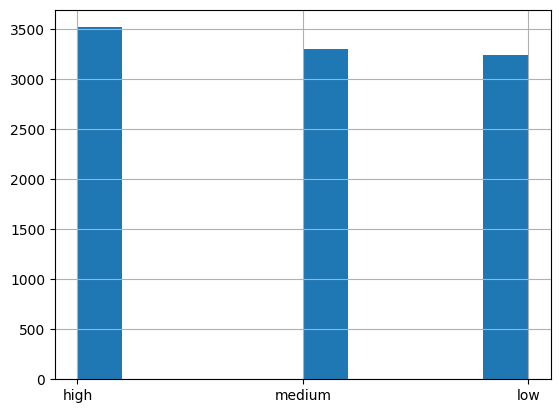

In [ ]:
# распределение числа машин по ценовым категориям похоже на равномерное распределение
data["price_category"].hist()

<Axes: >

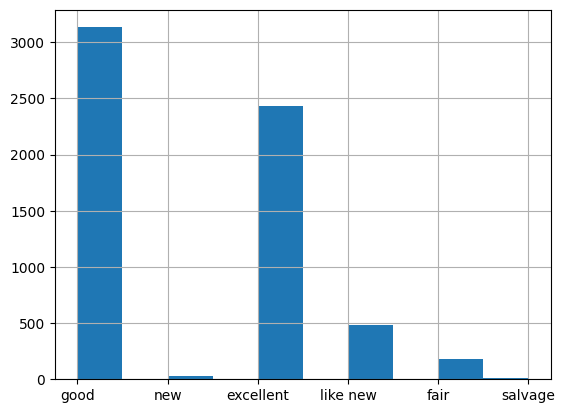

In [ ]:
# распределение состояния продаваемого автомобиля.
# если значения категорий упорядочить следующим образом  ['new', 'like new', 'excellent', 'good','fair', 'salvage']
data["condition"].hist()

In [ ]:
data["condition"].value_counts()

good         3134
excellent    2429
like new      482
fair          179
new            31
salvage        13
Name: condition, dtype: int64

<Axes: >

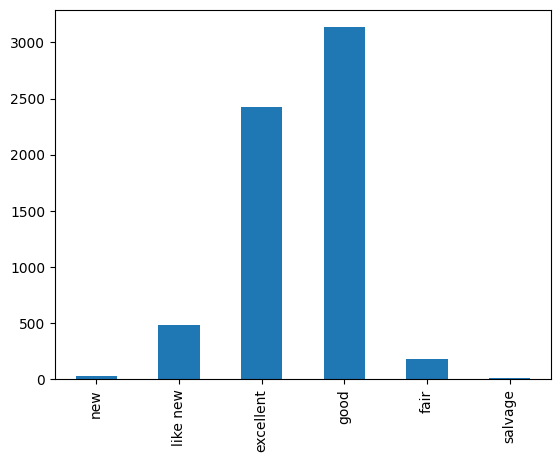

In [ ]:
# сконвертируем аггрегированные данные в датафрейм и введем новый столбец 'rate',
# после этого построим гистограмму и ее распределение чем-то напоминает нормальное или биномаильное
df1= pd.DataFrame(data['condition'].value_counts())
df1['rate'] = [4,3,2,5,1,6]
df1 = df1.sort_values(by='rate', ascending=True)
df1['condition'].plot(kind='bar')

<Axes: >

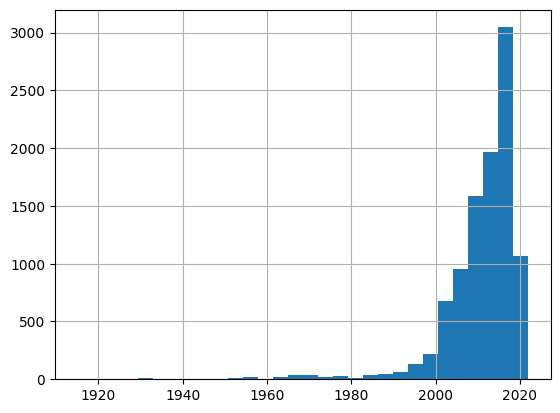

In [ ]:
# распределение числа продаваемых автомобилей в зависимости от года выпуска , похоже на beta-распределение
data["year"].hist(bins=30)